# What's the Weather Like?

## Observed Data Trend 1:

The clearest trend shown in the four below plots is for Latitude vs. Max Temp. The data shows a nice bell curve centered near the 20 degree N latitude. It would be interesting to track this over a year to see how this changes for the different seasons. 

## Observed Data Trend 2:

For the relation Latitude vs. Humidity, one interesting note is that a majority of the cities have a humidity of above 60% and almost all of the cities are at least at the 20% humidity mark. I would be interested in tracking this relationship of humidty vs. distane of city from nearest ocean to see if there is any obvious trend here.

## Observed Data Trend 3:

A point of interest for the Latitude vs. Cloudiness plot is that there are clear groups of observations on the factors of 20% lines. However, there seems to be an exception at 60% and 80% where this group is actually on the 75% line. I assume that "cloudiness" reports are typically rounded to nice even values which is why we observe these groupings. Why many reports use the 75% rounded value instead of 60% or 80% whereas the other rounded reports are all factors of 20% is a bit odd. Maybe I am making the wrong assumption and the measure of cloudiness is very scientific and it just so happens that we rarely see 60% or 80% recordings but I am skeptical of this. I would further research the common practice for "cloudiness" reports to see what is really going on with the data here. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
# storing city names in first column of dataframe
df = pd.DataFrame(cities)
df = df.rename(columns = {0: "City"})

In [4]:
# creating column names
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Lat'] = ""
df['Lng'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jatai,,,,,,,,
1,busselton,,,,,,,,
2,qaanaaq,,,,,,,,
3,bluff,,,,,,,,
4,beringovskiy,,,,,,,,


In [5]:
# setting url and units parameter
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
# using my api_key
query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
# checking out the json file for a specific city to see keys
response = requests.get(query_url +"London").json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 69.01,
  'pressure': 1018,
  'humidity': 64,
  'temp_min': 63,
  'temp_max': 73.4},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 180},
 'clouds': {'all': 100},
 'dt': 1561406244,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.017,
  'country': 'GB',
  'sunrise': 1561347827,
  'sunset': 1561407709},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [8]:
# data retreival process

print("Beginning Data Retrieval \n ---------------------")

for index, row in df.iterrows():
    
    city_name = row["City"]

    # assemble url and make API request
    print(f"Processing Record for Index {index}: {city_name}")
    response = requests.get(query_url + city_name).json()
    
    #storing each value from json to dataframe city by city, if keyerror or indexerror skip and print message
    try: 
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
              
              
print("--------------------- \nData Retrieval Complete. \n---------------------")

Beginning Data Retrieval 
 ---------------------
Processing Record for Index 0: jatai
Processing Record for Index 1: busselton
Processing Record for Index 2: qaanaaq
Processing Record for Index 3: bluff
Processing Record for Index 4: beringovskiy
Processing Record for Index 5: harper
Processing Record for Index 6: barrow
Processing Record for Index 7: castro
Processing Record for Index 8: constitucion
Processing Record for Index 9: enid
Processing Record for Index 10: karratha
Processing Record for Index 11: dikson
Processing Record for Index 12: longyearbyen
Processing Record for Index 13: biak
Processing Record for Index 14: dogondoutchi
Processing Record for Index 15: korla
City not found... skipping.
Processing Record for Index 16: coquimbo
Processing Record for Index 17: bredasdorp
Processing Record for Index 18: rikitea
Processing Record for Index 19: lyaskelya
Processing Record for Index 20: yellowknife
Processing Record for Index 21: port alfred
Processing Record for Index 22: 

Processing Record for Index 179: krasnovishersk
Processing Record for Index 180: verkhnevilyuysk
Processing Record for Index 181: sakakah
City not found... skipping.
Processing Record for Index 182: torbay
Processing Record for Index 183: liapades
City not found... skipping.
Processing Record for Index 184: hilo
Processing Record for Index 185: arraial do cabo
Processing Record for Index 186: qui nhon
City not found... skipping.
Processing Record for Index 187: bandarbeyla
Processing Record for Index 188: pareora
Processing Record for Index 189: melfi
Processing Record for Index 190: cocal
Processing Record for Index 191: sao filipe
Processing Record for Index 192: ankpa
Processing Record for Index 193: amderma
City not found... skipping.
Processing Record for Index 194: isangel
Processing Record for Index 195: nome
Processing Record for Index 196: tiksi
Processing Record for Index 197: svetlyy
City not found... skipping.
Processing Record for Index 198: north bend
Processing Record fo

Processing Record for Index 358: jiayuguan
Processing Record for Index 359: cap malheureux
Processing Record for Index 360: coihaique
Processing Record for Index 361: hibbing
Processing Record for Index 362: mega
Processing Record for Index 363: ewo
Processing Record for Index 364: abnub
Processing Record for Index 365: tuatapere
Processing Record for Index 366: cayenne
Processing Record for Index 367: teodoro sampaio
Processing Record for Index 368: saravan
Processing Record for Index 369: cherskiy
Processing Record for Index 370: ambon
Processing Record for Index 371: russell
Processing Record for Index 372: mezen
Processing Record for Index 373: lima
Processing Record for Index 374: udachnyy
Processing Record for Index 375: nemuro
Processing Record for Index 376: muncar
Processing Record for Index 377: baiquan
Processing Record for Index 378: huangmei
Processing Record for Index 379: solginskiy
Processing Record for Index 380: jatiroto
Processing Record for Index 381: louisbourg
Cit

Processing Record for Index 544: paradwip
City not found... skipping.
Processing Record for Index 545: alugan
Processing Record for Index 546: oktyabrskiy
Processing Record for Index 547: rundu
Processing Record for Index 548: carinhanha
Processing Record for Index 549: prabumulih
Processing Record for Index 550: uruana
Processing Record for Index 551: elizabeth city
Processing Record for Index 552: hamilton
Processing Record for Index 553: mirnyy
Processing Record for Index 554: dhidhdhoo
Processing Record for Index 555: tadine
Processing Record for Index 556: gagarin
Processing Record for Index 557: magadan
Processing Record for Index 558: sillod
Processing Record for Index 559: umm lajj
Processing Record for Index 560: acapulco
Processing Record for Index 561: piacabucu
Processing Record for Index 562: kuche
City not found... skipping.
Processing Record for Index 563: lazo
Processing Record for Index 564: winnemucca
Processing Record for Index 565: xai-xai
Processing Record for Inde

In [9]:
# checking the dataframe now
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jatai,22,IN,1561406398,45,28.97,76.18,91.31,5.68
1,busselton,100,AU,1561406399,71,-33.64,115.35,57,15.05
2,qaanaaq,100,GL,1561406399,66,77.48,-69.36,34.79,2.53
3,bluff,0,AU,1561406399,63,-23.58,149.07,49.91,7.23
4,beringovskiy,100,RU,1561406400,91,63.05,179.32,46.13,8.37


In [10]:
# replacing null values with Nan
df = df.replace('', np.NaN)

In [11]:
# exporting data to csv
df.to_csv(r'weather_data.csv')

In [12]:
# storing today's date for titles
today = date.today().strftime('%m/%d/%y')

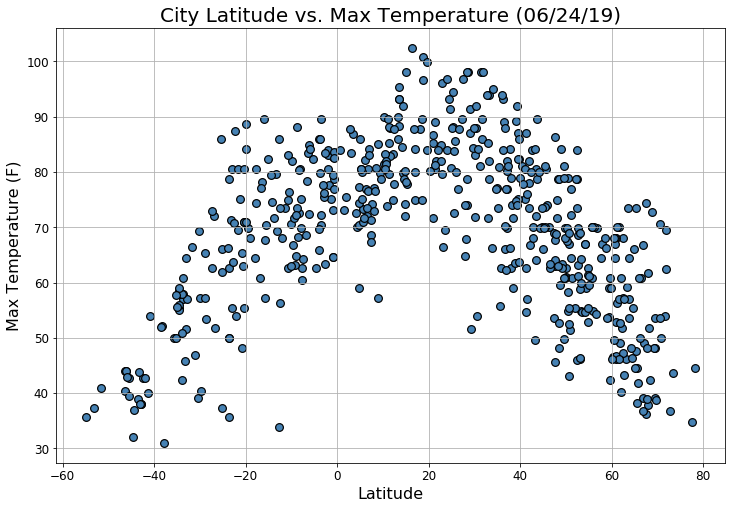

In [13]:
# using pandas plot wrapper to plot each plot
df.plot(kind = "scatter", x = ("Lat"), y = "Max Temp", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.savefig('Max_Temp.png')

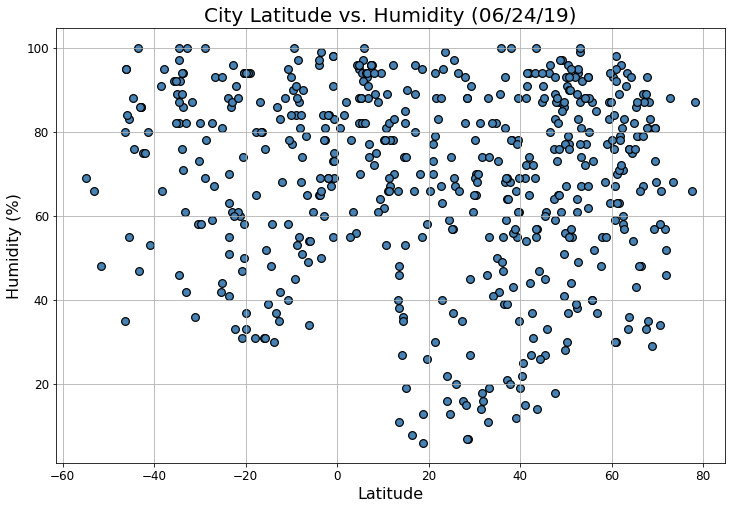

In [14]:
# sometimes record with report humidities well above 100 and this would significantly affect the scaling of my plot 
# so here I am removing data with that error

humid_df = df[df.Humidity <= 100]
humid_df.plot(kind = "scatter", x = ("Lat"), y = "Humidity", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Humidity ({today})", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.savefig('Humidity.png')

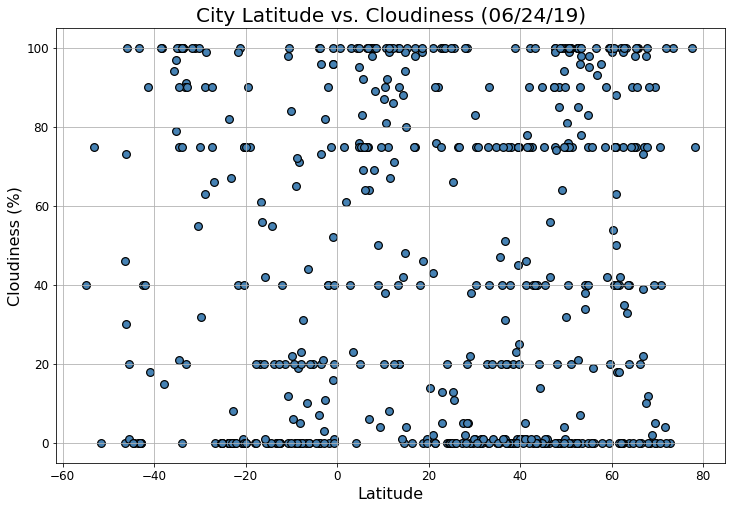

In [15]:
df.plot(kind = "scatter", x = ("Lat"), y = "Cloudiness", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Cloudiness ({today})", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.savefig('Cloudiness.png')

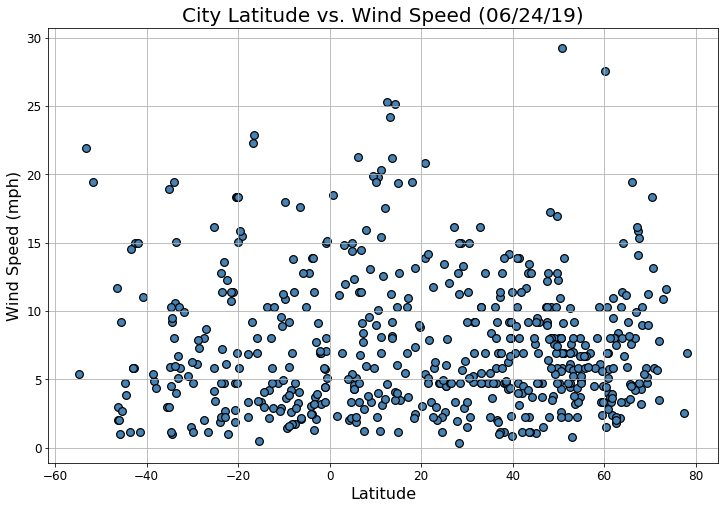

In [16]:
df.plot(kind = "scatter", x = ("Lat"), y = "Wind Speed", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Wind Speed ({today})", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.savefig('Wind_Speed.png')